## Menentukan parameter sebelum modulasi OFDM

In [1]:
import numpy as np
import scipy.interpolate
import scipy

In [2]:
K = 64 # number of OFDM subcarriers
CP = K//4 #print(CP);  # length of the cyclic prefix: 25% of the block
P = CP//2 # number of pilot carriers per OFDM block

## Menentukan Value setiap komponen: Carriers, Pilot

In [3]:
pilotValue = 3+3j # The known value each pilot transmits

allCarriers = np.arange(K)  # indices of all subcarriers ([0, 1, ... K-1])

pilotCarriers = allCarriers[::K//P] # Pilots is every (K/P)th carrier.

# For convenience of channel estimation, let's make the last carriers also be a pilot
pilotCarriers = np.hstack([pilotCarriers, np.array([allCarriers[-1]])])
P = P+1

# data carriers are all remaining carriers
dataCarriers = np.delete(allCarriers, pilotCarriers)

In [4]:
print("pilot value:", pilotValue)
print("all carriers:", allCarriers)
print("pilot carriers:", pilotCarriers)
print("data carrires:", dataCarriers)

pilot value: (3+3j)
all carriers: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63]
pilot carriers: [ 0  8 16 24 32 40 48 56 63]
data carrires: [ 1  2  3  4  5  6  7  9 10 11 12 13 14 15 17 18 19 20 21 22 23 25 26 27
 28 29 30 31 33 34 35 36 37 38 39 41 42 43 44 45 46 47 49 50 51 52 53 54
 55 57 58 59 60 61 62]


## Menentukan μ (OFDM Symbol) dan Payloadbits per OFDM

In [5]:
mu = 4 # untuk 16QAM
payloadBits_per_OFDM = len(dataCarriers) * mu

## Membuat Mapping Table

In [6]:
mapping_table = {
    (0,0,0,0) : -3-3j,
    (0,0,0,1) : -3-1j,
    (0,0,1,0) : -3+3j,
    (0,0,1,1) : -3+1j,
    (0,1,0,0) : -1-3j,
    (0,1,0,1) : -1-1j,
    (0,1,1,0) : -1+3j,
    (0,1,1,1) : -1+1j,
    (1,0,0,0) :  3-3j,
    (1,0,0,1) :  3-1j,
    (1,0,1,0) :  3+3j,
    (1,0,1,1) :  3+1j,
    (1,1,0,0) :  1-3j,
    (1,1,0,1) :  1-1j,
    (1,1,1,0) :  1+3j,
    (1,1,1,1) :  1+1j
}

## Menentukan Channel Response, Signal to Noise Radio in desible (SNRdb) pada receiver

In [7]:
channelResponse = np.array([1, 0, 0.3+0.3j])
H_exact = np.fft.fft(channelResponse, K)
SNRdb = 24

In [8]:
bits = np.random.binomial(n=1, p=0.5, size=(payloadBits_per_OFDM, )) # input data dalam bentuk bits

In [9]:
def SP(bits):
    return bits.reshape((len(dataCarriers), mu))

bits_SP = SP(bits)

In [10]:
print(bits_SP)

[[0 0 1 1]
 [1 0 1 1]
 [1 1 1 1]
 [0 0 0 0]
 [1 1 0 0]
 [0 1 1 1]
 [1 1 1 1]
 [1 0 1 0]
 [1 1 0 0]
 [0 0 1 0]
 [1 1 0 0]
 [1 0 1 1]
 [1 0 1 0]
 [1 1 0 0]
 [1 1 1 0]
 [0 0 1 0]
 [0 1 1 1]
 [0 0 1 1]
 [0 0 1 0]
 [1 0 1 1]
 [1 1 1 0]
 [1 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [1 1 0 1]
 [1 1 1 1]
 [0 0 0 1]
 [0 1 1 1]
 [1 0 0 1]
 [0 0 0 1]
 [1 1 0 1]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [1 0 1 1]
 [0 1 0 0]
 [1 0 0 1]
 [0 1 0 1]
 [0 1 1 0]
 [0 0 0 0]
 [0 0 0 1]
 [1 1 1 1]
 [0 1 0 1]
 [1 0 1 0]
 [1 0 0 1]
 [0 0 0 0]
 [0 0 0 0]
 [0 1 1 1]
 [0 0 0 0]
 [1 1 0 0]
 [1 1 1 1]
 [0 0 0 0]
 [1 1 0 0]
 [0 0 0 0]
 [1 1 1 1]]


In [11]:
print(len(bits_SP))

55


In [12]:
def Mapping(bits):
    return np.array([mapping_table[tuple(b)] for b in bits])

QAM = Mapping(bits_SP)

In [13]:
print(QAM)
print(len(QAM))

[-3.+1.j  3.+1.j  1.+1.j -3.-3.j  1.-3.j -1.+1.j  1.+1.j  3.+3.j  1.-3.j
 -3.+3.j  1.-3.j  3.+1.j  3.+3.j  1.-3.j  1.+3.j -3.+3.j -1.+1.j -3.+1.j
 -3.+3.j  3.+1.j  1.+3.j  3.-1.j -3.-3.j -3.-3.j  1.-1.j  1.+1.j -3.-1.j
 -1.+1.j  3.-1.j -3.-1.j  1.-1.j -3.+1.j -1.-3.j -1.-1.j  3.+1.j -1.-3.j
  3.-1.j -1.-1.j -1.+3.j -3.-3.j -3.-1.j  1.+1.j -1.-1.j  3.+3.j  3.-1.j
 -3.-3.j -3.-3.j -1.+1.j -3.-3.j  1.-3.j  1.+1.j -3.-3.j  1.-3.j -3.-3.j
  1.+1.j]
55


In [14]:
def OFDM_symbol(QAM_payload):
    symbol = np.zeros(K, dtype=complex) # the overall K subcarriers
    symbol[pilotCarriers] = pilotValue  # allocate the pilot subcarriers 
    symbol[dataCarriers] = QAM_payload  # allocate the pilot subcarriers
    return symbol

OFDM_data = OFDM_symbol(QAM)

In [15]:
print(len(OFDM_data))
print(OFDM_data)

64
[ 3.+3.j -3.+1.j  3.+1.j  1.+1.j -3.-3.j  1.-3.j -1.+1.j  1.+1.j  3.+3.j
  3.+3.j  1.-3.j -3.+3.j  1.-3.j  3.+1.j  3.+3.j  1.-3.j  3.+3.j  1.+3.j
 -3.+3.j -1.+1.j -3.+1.j -3.+3.j  3.+1.j  1.+3.j  3.+3.j  3.-1.j -3.-3.j
 -3.-3.j  1.-1.j  1.+1.j -3.-1.j -1.+1.j  3.+3.j  3.-1.j -3.-1.j  1.-1.j
 -3.+1.j -1.-3.j -1.-1.j  3.+1.j  3.+3.j -1.-3.j  3.-1.j -1.-1.j -1.+3.j
 -3.-3.j -3.-1.j  1.+1.j  3.+3.j -1.-1.j  3.+3.j  3.-1.j -3.-3.j -3.-3.j
 -1.+1.j -3.-3.j  3.+3.j  1.-3.j  1.+1.j -3.-3.j  1.-3.j -3.-3.j  1.+1.j
  3.+3.j]


In [16]:
def IFFT(OFDM_data):
  return np.fft.ifft(OFDM_data)

OFDM_time = IFFT(OFDM_data)

In [17]:
print(len(OFDM_time))
print(OFDM_time)

64
[ 0.1875    +1.25000000e-01j -0.27904626+1.51756159e-01j
 -0.08952217-2.46802393e-02j -0.04901042+2.32541151e-01j
 -0.19163726+1.32843547e-01j  0.47932779-1.70811150e-01j
  0.11658201+2.78118216e-01j -0.61833456+1.46074885e-01j
  0.88101213+7.61373782e-01j  0.16060808+3.33317376e-01j
  0.15279944+1.53243262e-02j -0.10302984-1.29563031e-01j
 -0.44680203-1.39848884e-01j  0.05787173-3.62185301e-01j
  0.30687354+2.64463634e-02j  0.08246992-1.82826204e-01j
  0.40625   +1.56250000e-01j -0.35524567-5.53566996e-01j
  0.1617043 +1.78674589e-01j -0.07246941-1.65129222e-01j
  0.38588068-4.75874615e-01j -0.08638994-4.01036305e-01j
 -0.29679119+5.17798367e-03j  0.1482689 +2.22865278e-01j
  0.18148787+2.82820392e-01j -0.39159424-3.16921488e-01j
  0.38661842-2.79262768e-01j  0.31823973-1.81798055e-01j
 -0.0262467 +3.25362991e-01j -0.0249799 +1.36253421e-01j
 -0.23070621+7.05107112e-02j -0.15660106+1.18847594e-01j
  0.25      +5.00000000e-01j  0.72813454-1.23954094e-01j
  0.03131733-2.57211980e-01j

In [32]:
fft_result = np.fft.fft(OFDM_time)
print(fft_result)

[ 3.+3.j -3.+1.j  3.+1.j  1.+1.j -3.-3.j  1.-3.j -1.+1.j  1.+1.j  3.+3.j
  3.+3.j  1.-3.j -3.+3.j  1.-3.j  3.+1.j  3.+3.j  1.-3.j  3.+3.j  1.+3.j
 -3.+3.j -1.+1.j -3.+1.j -3.+3.j  3.+1.j  1.+3.j  3.+3.j  3.-1.j -3.-3.j
 -3.-3.j  1.-1.j  1.+1.j -3.-1.j -1.+1.j  3.+3.j  3.-1.j -3.-1.j  1.-1.j
 -3.+1.j -1.-3.j -1.-1.j  3.+1.j  3.+3.j -1.-3.j  3.-1.j -1.-1.j -1.+3.j
 -3.-3.j -3.-1.j  1.+1.j  3.+3.j -1.-1.j  3.+3.j  3.-1.j -3.-3.j -3.-3.j
 -1.+1.j -3.-3.j  3.+3.j  1.-3.j  1.+1.j -3.-3.j  1.-3.j -3.-3.j  1.+1.j
  3.+3.j]


In [18]:
def addCP(OFDM_time):
  cp = OFDM_time[-CP:]               # take the last CP samples ...
  return np.hstack([cp, OFDM_time])  # ... and add them to the beginning

OFDM_withCP = addCP(OFDM_time)

In [19]:
print(len(OFDM_withCP))
print(OFDM_withCP)

80
[ 0.03125   +2.18750000e-01j  0.11731319+5.56179023e-02j
 -0.1918878 -1.61947413e-01j -0.33988059+3.74645526e-01j
 -0.03232729-2.26790428e-01j -0.02972983+2.16588305e-01j
 -0.16823548+1.00862292e-01j  0.43450658+1.82085396e-01j
  0.75601213+5.92179608e-01j -0.25330182+9.76909419e-02j
 -0.14527912+2.82349675e-01j  0.15046941-2.35326335e-04j
  0.2030234 +3.77302052e-01j -0.03300688+2.39512446e-01j
  0.02263731-4.27334953e-01j  0.51418531-1.95957903e-01j
  0.1875    +1.25000000e-01j -0.27904626+1.51756159e-01j
 -0.08952217-2.46802393e-02j -0.04901042+2.32541151e-01j
 -0.19163726+1.32843547e-01j  0.47932779-1.70811150e-01j
  0.11658201+2.78118216e-01j -0.61833456+1.46074885e-01j
  0.88101213+7.61373782e-01j  0.16060808+3.33317376e-01j
  0.15279944+1.53243262e-02j -0.10302984-1.29563031e-01j
 -0.44680203-1.39848884e-01j  0.05787173-3.62185301e-01j
  0.30687354+2.64463634e-02j  0.08246992-1.82826204e-01j
  0.40625   +1.56250000e-01j -0.35524567-5.53566996e-01j
  0.1617043 +1.78674589e-01j

In [20]:
def channel(signal):
  convolved = np.convolve(signal, channelResponse)
  signal_power = np.mean(abs(convolved**2))
  sigma2 = signal_power * 10**(-SNRdb/10)  # calculate noise power based on signal power and SNR
  print ("RX Signal power: %.4f. Noise power: %.4f" % (signal_power, sigma2))
  # Generate complex noise with given variance
  noise = np.sqrt(sigma2/2) * (np.random.randn(*convolved.shape)+1j*np.random.randn(*convolved.shape))
  return convolved + noise

OFDM_TX = OFDM_withCP
OFDM_RX = channel(OFDM_TX)


RX Signal power: 0.1860. Noise power: 0.0007


In [21]:
print(len(OFDM_TX))
print(OFDM_TX)

80
[ 0.03125   +2.18750000e-01j  0.11731319+5.56179023e-02j
 -0.1918878 -1.61947413e-01j -0.33988059+3.74645526e-01j
 -0.03232729-2.26790428e-01j -0.02972983+2.16588305e-01j
 -0.16823548+1.00862292e-01j  0.43450658+1.82085396e-01j
  0.75601213+5.92179608e-01j -0.25330182+9.76909419e-02j
 -0.14527912+2.82349675e-01j  0.15046941-2.35326335e-04j
  0.2030234 +3.77302052e-01j -0.03300688+2.39512446e-01j
  0.02263731-4.27334953e-01j  0.51418531-1.95957903e-01j
  0.1875    +1.25000000e-01j -0.27904626+1.51756159e-01j
 -0.08952217-2.46802393e-02j -0.04901042+2.32541151e-01j
 -0.19163726+1.32843547e-01j  0.47932779-1.70811150e-01j
  0.11658201+2.78118216e-01j -0.61833456+1.46074885e-01j
  0.88101213+7.61373782e-01j  0.16060808+3.33317376e-01j
  0.15279944+1.53243262e-02j -0.10302984-1.29563031e-01j
 -0.44680203-1.39848884e-01j  0.05787173-3.62185301e-01j
  0.30687354+2.64463634e-02j  0.08246992-1.82826204e-01j
  0.40625   +1.56250000e-01j -0.35524567-5.53566996e-01j
  0.1617043 +1.78674589e-01j

In [22]:
print(len(OFDM_RX))
print(OFDM_RX)

82
[ 0.03563475+0.21067244j  0.1068446 +0.03645107j -0.25900047-0.08858499j
 -0.35402519+0.44261364j -0.06941495-0.30646102j -0.26045582+0.23725313j
 -0.09548902+0.02391983j  0.33227658+0.23935353j  0.65480591+0.58904817j
 -0.19703168+0.2714435j  -0.10342136+0.67800513j  0.06487639-0.01356929j
  0.08761636+0.44046868j  0.02833491+0.29445658j -0.00952212-0.26187808j
  0.41655541-0.12491709j  0.33303836-0.02180784j -0.08874685+0.25231634j
 -0.09638259+0.08228279j -0.1918632 +0.19060958j -0.21455046+0.12258035j
  0.38858288-0.13675915j  0.01889731+0.24902153j -0.41976234+0.23457773j
  0.80741837+0.88129525j -0.05934572+0.17846215j  0.1898983 +0.51043071j
 -0.15666137+0.02265309j -0.41189073-0.07599519j  0.07149784-0.42597821j
  0.19735501-0.10422523j  0.22742867-0.25067038j  0.46401414+0.21874739j
 -0.2935703 -0.57476898j  0.25636415+0.34874629j -0.01734336-0.43396559j
  0.36410326-0.38644832j -0.09462249-0.45648104j -0.05465167-0.03274305j
  0.26230434+0.07308847j  0.08123375+0.20687068j

In [23]:
complex_numbers = OFDM_RX
normalized_complex = [c / np.max(np.abs(complex_numbers)) for c in complex_numbers]

In [24]:
len(normalized_complex)

82

In [25]:
reverse_normalized_complex = [c * np.max(np.abs(complex_numbers)) for c in normalized_complex]

In [26]:
reverse_normalized_complex

[(0.0356347547062758+0.2106724395111582j),
 (0.10684459719677343+0.036451072704335875j),
 (-0.2590004660479922-0.08858498970164735j),
 (-0.35402518912065306+0.4426136400274501j),
 (-0.06941495445613705-0.3064610160898493j),
 (-0.2604558158566931+0.2372531318827327j),
 (-0.0954890166143344+0.023919831172611903j),
 (0.3322765775229577+0.2393535349374464j),
 (0.6548059063268565+0.5890481740611795j),
 (-0.19703168207552352+0.2714435001916716j),
 (-0.10342135703645704+0.6780051256455145j),
 (0.06487639302765039-0.013569293797422126j),
 (0.08761636345839566+0.44046868033968395j),
 (0.028334907613801894+0.2944565814566097j),
 (-0.009522120600688074-0.26187807821992415j),
 (0.41655540681364556-0.12491708729887882j),
 (0.33303836062347786-0.0218078419312495j),
 (-0.08874685106205384+0.2523163373789255j),
 (-0.0963825888534371+0.08228279203843682j),
 (-0.1918631974810903+0.1906095774547759j),
 (-0.21455045893694133+0.12258035462376538j),
 (0.38858288062455526-0.13675914937454392j),
 (0.018897307

In [27]:
6.88552258e-01+0.32382033j

(0.688552258+0.32382033j)

In [28]:
import numpy as np

# Replace this list with your complex numbers
complex_numbers = [2 + 3j, 1 - 2j, -4 + 5j]

# Calculate the magnitude of each complex number
magnitudes = [abs(c) for c in complex_numbers]

# Now, magnitudes contains the magnitudes of the complex numbers.
print("Magnitudes:", magnitudes)

Magnitudes: [3.605551275463989, 2.23606797749979, 6.4031242374328485]


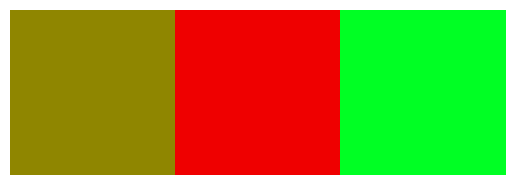

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import hsv_to_rgb

complex_numbers = [2 + 3j, 1 - 2j, -4 + 5j]

# Calculate magnitudes and phases
magnitudes = [np.abs(c) for c in complex_numbers]
phases = [np.angle(c) for c in complex_numbers]

# Normalize magnitudes
normalized_magnitudes = [m / max(magnitudes) for m in magnitudes]

# Map magnitudes to Value (V) and phases to Hue (H)
hsv_colors = [(phase / (2 * np.pi), 1, mag) for phase, mag in zip(phases, normalized_magnitudes)]

# Convert HSV colors to RGB
rgb_colors = [hsv_to_rgb(color) for color in hsv_colors]

plt.imshow([rgb_colors])
plt.axis('off')
plt.show()

In [30]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import rgb_to_hsv

# Sample RGB values (representing complex numbers)
rgb_colors = [(0.3, 0.6, 0.8), (0.9, 0.2, 0.5), (0.5, 0.7, 0.2)]

# Convert RGB to HSV
hsv_colors = [rgb_to_hsv(color) for color in rgb_colors]

# Reverse mapping: Extract H (Hue) and V (Value, brightness)
phases = [2 * np.pi * color[0] for color in hsv_colors]
magnitudes = [color[2] for color in hsv_colors]

# Reconstruct complex numbers
complex_numbers = [magnitude * np.exp(1j * phase) for magnitude, phase in zip(magnitudes, phases)]

# Print the resulting complex numbers
print(complex_numbers)


[(-0.7308363661140809-0.3253893144606399j), (0.8108719811121772-0.3904953652058025j), (0.07316992428735757+0.6961653267577913j)]
